<a href="https://colab.research.google.com/github/Pablo-RLV/Inteli-M8-T2/blob/main/Ponderada7/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação MNIST

## Importação de bibliotecas

In [ ]:
!pip install --upgrade tensorflow --quiet

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np

## Carregamento do dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

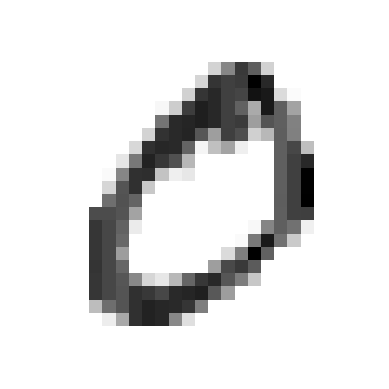

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.axis('off')
plt.show()

## Criação do modelo

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Utilização do modelo

In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2491 - accuracy: 0.9254
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1029 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0718 - accuracy: 0.9779


In [ ]:
model.save('num_reader.model')
number_model = tf.keras.models.load_model('num_reader.model')

In [ ]:
predictions = number_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


## Demonstração

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Loss: {val_loss:.4f}")
print(f"Acurácia: {val_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9745
Loss: 0.0903
Acurácia: 0.9745


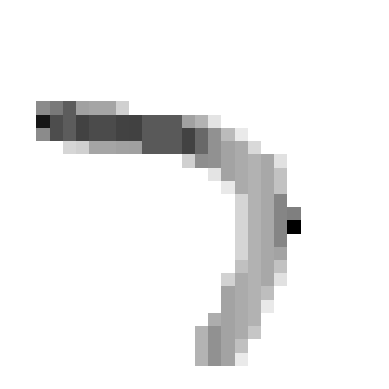


A predição realizada foi: 7


In [ ]:
# @title Mova a barra para testar a predição { run: "auto", display-mode:"form" }

slider = 60 # @param {type:"slider", min:0, max:100, step:1}
plt.imshow(x_test[slider],cmap=plt.cm.binary)
plt.axis('off')
plt.show()
print(f"\nA predição realizada foi: {np.argmax(predictions[slider])}")